In [75]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
train = pd.read_csv("train.csv")
print("Number of Data Points: ",len(train))
print(train.nunique(),end="\n\n\n")
train.head()

Number of Data Points:  948
match id                     948
team1                        143
team1_id                     152
team1_roster_ids             935
team2                        141
team2_id                     150
team2_roster_ids             924
winner                       133
winner_id                    139
toss winner                  141
toss decision                  2
venue                        125
city                         114
match_dt                     485
lighting                       3
series_name                   85
season                         5
ground_id                    123
team_count_50runs_last15     215
team_winp_last5               63
team1only_avg_runs_last15    637
team1_winp_team2_last15       11
ground_avg_runs_last15       679
dtype: int64




,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.000000,100.0,157.178571
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.000000,50.0,103.500000
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,We,10576,Ne,field,Tt Be Nm,Nottingham,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,173.266667,0.0,154.333333
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,Ga An Ws,36084,Ga An Ws,bat,Bn La Sm Ta Td,Tarouba,2023-09-10,day match,Cn Pr Le,2023,14300,2.166667,1.975610,164.266667,50.0,144.250000
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,Gt Ts,48341,Gt Ts,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,164.666667,0.0,189.000000


In [76]:
print(sorted(train["team1_id"].unique()))

[20, 27, 34, 41, 48, 55, 62, 69, 76, 90, 104, 118, 132, 146, 174, 188, 195, 202, 209, 216, 223, 237, 251, 272, 279, 293, 769, 825, 895, 958, 1224, 1350, 1490, 6698, 6838, 7258, 7573, 7608, 7727, 8056, 8182, 8301, 8700, 8917, 8987, 9701, 9876, 9967, 10366, 10576, 10618, 11157, 11220, 11283, 11374, 11465, 11591, 12046, 12389, 12473, 12634, 12669, 13131, 13397, 13474, 13957, 13971, 14454, 14629, 14860, 15301, 15413, 15497, 15623, 17583, 17653, 17744, 17982, 18360, 18570, 22497, 22763, 22784, 23113, 23316, 23750, 23841, 23869, 30393, 30400, 30407, 30414, 30421, 30428, 30435, 32388, 33914, 33921, 33928, 33935, 33942, 33949, 33956, 33963, 35790, 36014, 36070, 36084, 36098, 36112, 36126, 38814, 40298, 40424, 40452, 40550, 40564, 40578, 40592, 40606, 42573, 44904, 45072, 45926, 45933, 45940, 45954, 45961, 46731, 46738, 46745, 46752, 46759, 46766, 46773, 46780, 47480, 47487, 47494, 47501, 47508, 47529, 48334, 48341, 48733, 48922, 48929, 48936, 48943, 48950, 49650, 49657]


### Thats wayyyyyyy too many team IDs
This seems to be data across multiple tournaments, not just one tournament like IPL. There are 150 unique Team IDs in a dataset of 950 datapoints. Which means grouping data according to Teams is most likely not gonna have enough datapoints for proper learning. Predictions should use the Player Roster the most

# Standard First Step
I'm gonna define a opencsv() that does all the preliminary printings [.isna(), .nunique(), len(), .columns, .head()]

In [16]:
def opencsv(path):
    df = pd.read_csv(path)
    print("Number of Datapoints: ",len(df),"\n")
    print("Number of Null Values:\n",df.isnull().sum(),"\n")
    print("Number of Unique Values:\n",df.nunique(),"\n")
    print("Columns:",df.columns,"\n")
    print("\nHead:\n",df.head())
    return df

In [22]:
train_old = opencsv("train.csv")

Number of Datapoints:  948 

Number of Null Values:
 match id                      0
team1                         0
team1_id                      0
team1_roster_ids              0
team2                         0
team2_id                      0
team2_roster_ids              0
winner                        0
winner_id                     0
toss winner                   0
toss decision                 0
venue                         0
city                          0
match_dt                      0
lighting                      0
series_name                   0
season                        0
ground_id                     0
team_count_50runs_last15      0
team_winp_last5               0
team1only_avg_runs_last15    21
team1_winp_team2_last15       0
ground_avg_runs_last15       53
dtype: int64 

Number of Unique Values:
 match id                     948
team1                        143
team1_id                     152
team1_roster_ids             935
team2                        141
team2

In [69]:
match = opencsv("match.csv")
match

Number of Datapoints:  1689 

Number of Null Values:
 match id                    0
team1                       0
team2                       0
winner                      0
by                          0
win amount                  0
toss winner                 0
toss decision               0
venue                       0
city                      178
match_dt                    0
lighting                    0
series_name                 0
season                      0
ground_id                   0
umpire1                   181
umpire2                   181
inning1_runs                0
inning1_wickets             0
inning1_balls               0
inning2_runs                0
inning2_wickets             0
inning2_balls               0
team1_id                    0
team1_roster_ids            0
team2_id                    0
team2_roster_ids            0
series_type                 0
winner_id                   0
player_of_the_match_id    514
dtype: int64 

Number of Unique Values:
 match

,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,umpire1,umpire2,inning1_runs,inning1_wickets,inning1_balls,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,player_of_the_match_id
0,8638034,Nn Ds,Wn,Wn,wickets,9.0,Wn,field,By Ol,Mount Maunganui,2021-01-01,night match,Sr Sh,2020/21,17681,Dn Mw,TJ Pe,148,6,130,152.0,1.0,97.0,17982,7907451.0:4381761.0:31464.0:258649.0:4949790.0...,18570,2653993.0:6718326.0:6718382.0:2486896.0:228878...,other_domestic,18570,NaN
1,8588005,Me Rs,Sy Tr,Sy Tr,runs,7.0,Sy Tr,field,Ca Ol,Carrara,2021-01-01,night match,Bg Bh Le,2020/21,6663,D Tr,PJ Ge,166,6,106,117.0,2.0,74.0,33942,37351.0:46794.0:5406540.0:2231928.0:181404.0:1...,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652....,other_domestic,33963,1749075.0
2,8587837,Sy Ss,Be Ht,Be Ht,wickets,4.0,Sy Ss,bat,Be Ct Gd,Brisbane,2021-01-02,night match,Bg Bh Le,2020/21,1476,GJ Dn,PJ Ge,165,8,126,171.0,6.0,119.0,33956,7869987.0:7620283.0:2076192.0:4002340.0:306369...,33921,7620269.0:2286437.0:87191.0:5786766.0:3114803....,other_domestic,33921,3890984.0
3,8638041,Nn Ds,Oo,Oo,wickets,2.0,Oo,field,By Ol,Mount Maunganui,2021-01-02,night match,Sr Sh,2020/21,17681,GA St,TJ Pe,153,7,128,156.0,8.0,126.0,17982,7907451.0:4381761.0:31464.0:4949790.0:258649.0...,18360,2319638.0:256080.0:7918280.0:3913447.0:2690498...,other_domestic,18360,NaN
4,8587921,Ht Hs,Me Ss,Ht Hs,runs,21.0,Me Ss,field,Be Ol,Hobart,2021-01-02,day/night match,Bg Bh Le,2020/21,6348,GA Ad,NR Je,164,5,126,143.0,9.0,123.0,33928,4223883.0:2161599.0:1655436.0:5788418.0:319948...,33949,363047.0:2275097.0:3901078.0:2275195.0:4230127...,other_domestic,33928,3125849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,9128601,Pb Ks,Ci Sr Ks,Pb Ks,runs,11.0,Ci Sr Ks,field,We Sm Mi,Mumbai,2022-04-25,night match,In Pr Le,2022,5004,M Es,Tn Sa,187,4,133,176.0,6.0,126.0,30407,2789079.0:197658.0:2398346.0:2827327.0:2082044...,30414,7422673.0:249087.0:3519011.0:5001170.0:232000....,In Pr Le,30407,197658.0
1685,9433241,Mx,St,St,wickets,9.0,St,field,Te Cr As Cy Gd Tn,Taunton,2023-06-02,day/night match,Vy Bt,2023,1042,BV Tr,Mk Nl,136,10,115,142.0,2.0,81.0,8700,4421689.0:7752989.0:1941743.0:4489722.0:767287...,9701,6139370.0:7694581.0:3294444.0:3239102.0:632036...,other_domestic,9701,NaN
1686,9097227,Bd,Wn Pe,Wn Pe,wickets,6.0,Bd,bat,St Gs Pk Pt Eh,Port Elizabeth,2022-02-07,day match,CA T0 Ce,2021/22,1224,BM We,S Ge,142,6,126,143.0,4.0,105.0,22497,4239773.0:1941743.0:3007969.0:4172972.0:155625...,23869,323049.0:4876122.0:4164978.0:1837205.0:3373138...,other_domestic,23869,323049.0
1687,9516695,Rn Rs,Ss Hd,Ss Hd,wickets,4.0,Rn Rs,bat,Si Mh Sm Jr,Jaipur,2023-05-07,night match,In Pr Le,2023,4661,Nn Mn,Vd Sn,214,2,125,217.0,6.0,125.0,30428,8058959.0:2162782.0:2981614.0:4690188.0:212569...,36014,5958840.0:7491294.0:3127354.0:3057312.0:420349...,In Pr Le,36014,5764576.0


In [70]:
batsman = opencsv("batsman.csv")
batsman

Number of Datapoints:  24483 

Number of Null Values:
 match id                  0
batsman                   0
batsman_id                0
batsman_details           0
is_batsman_captain        0
is_batsman_keeper         0
inning                    0
runs                      0
balls_faced               0
over_faced_first          0
wicket kind            5328
out_by_bowler          5328
out_by_fielder            0
bowler_id              6355
bowler_details         6355
is_bowler_keeper       5785
is_bowler_captain      6355
strike_rate               9
Fours                 10283
Sixes                 15489
match_dt                  0
dtype: int64 

Number of Unique Values:
 match id              1689
batsman               2019
batsman_id            2118
batsman_details        482
is_batsman_captain       2
is_batsman_keeper        2
inning                   2
runs                   134
balls_faced             72
over_faced_first       168
wicket kind             10
out_by_bowler      

,match id,batsman,batsman_id,batsman_details,is_batsman_captain,is_batsman_keeper,inning,runs,balls_faced,over_faced_first,wicket kind,out_by_bowler,out_by_fielder,bowler_id,bowler_details,is_bowler_keeper,is_bowler_captain,strike_rate,Fours,Sixes,match_dt
0,8638034,KD Ce,7907451.0,NZ:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,7,5,1.1,caught,JS Nm,TM Jn,2486896.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,140.00,1.0,NaN,2021-01-01
1,8638034,TL St,4381761.0,NZ:Right-hand bat:None:,0.0,1.0,1,46,46,1.2,caught,R Ra,MG Bl,6718382.0,NZ:Left-hand bat:Slow left-arm orthodox:,0.0,0.0,100.00,4.0,1.0,2021-01-01
2,8638034,HR Cr,4949790.0,NZ:Right-hand bat:Right-arm offbreak:,0.0,0.0,1,9,10,12.1,caught,PF Yd,R Ra,4950294.0,NZ:Right-hand bat:Legbreak googly:,0.0,0.0,90.00,NaN,NaN,2021-01-01
3,8638034,BR Hn,3834305.0,NZ:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,28,22,13.6,caught,HK Bt,FH An,1585464.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,127.27,3.0,NaN,2021-01-01
4,8638034,SC Kn,3776849.0,NZ:Right-hand bat:Right-arm fast-medium:,0.0,0.0,1,18,13,17.2,NaN,NaN,None,NaN,NaN,NaN,NaN,138.46,NaN,1.0,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24478,9433633,CP Wd,2173688.0,ENG:Right-hand bat:Left-arm medium-fast:,0.0,0.0,1,1,1,20.4,NaN,NaN,None,NaN,NaN,NaN,NaN,100.00,NaN,NaN,2023-06-20
24479,9433633,JJ Wy,5241564.0,ENG:Right-hand bat:Right-arm offbreak:,0.0,0.0,1,37,28,6.6,stumped,TJ Sh,G Rn,1707628.0,ENG:Right-hand bat:Slow left-arm orthodox:,0.0,0.0,132.14,4.0,1.0,2023-06-20
24480,9433633,G Rn,4898074.0,SA:Right-hand bat:None:,0.0,1.0,2,1,6,1.1,caught,JA Tr,LA Dn,8833075.0,ENG:Right-hand bat:Right-arm fast-medium:,0.0,0.0,16.67,NaN,NaN,2023-06-20
24481,9433633,BJ Ws,8048074.0,ENG:Right-hand bat:None:,0.0,0.0,2,43,22,2.3,NaN,NaN,None,NaN,NaN,NaN,NaN,195.45,3.0,3.0,2023-06-20


In [71]:
bowler = opencsv("bowler.csv")
bowler

Number of Datapoints:  18539 

Number of Null Values:
 match id             0
bowler               0
bowler_id            0
bowler_details       0
is_bowler_captain    0
is_bowler_keeper     0
inning               0
runs                 0
wicket_count         0
balls_bowled         0
economy              0
maiden               0
dots                 0
Fours                0
Sixes                0
wides                0
noballs              0
match_dt             0
dtype: int64 

Number of Unique Values:
 match id             1689
bowler               1481
bowler_id            1541
bowler_details        412
is_bowler_captain       2
is_bowler_keeper        2
inning                  2
runs                   74
wicket_count            7
balls_bowled           25
economy               463
maiden                  4
dots                   24
Fours                  12
Sixes                  10
wides                   9
noballs                 6
match_dt              741
dtype: int64 

Columns

,match id,bowler,bowler_id,bowler_details,is_bowler_captain,is_bowler_keeper,inning,runs,wicket_count,balls_bowled,economy,maiden,dots,Fours,Sixes,wides,noballs,match_dt
0,8638034,BV Ss,6718396.0,NZ:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,21,0,12,10.50,0,3.0,1,1,3,1,2021-01-01
1,8638034,HK Bt,1585464.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,1,34,1,24,8.50,0,7.0,3,1,2,0,2021-01-01
2,8638034,JS Nm,2486896.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,1,23,2,24,5.75,0,12.0,1,1,0,0,2021-01-01
3,8638034,LV vn Bk,3083667.0,NED:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,31,1,24,7.75,0,9.0,4,0,2,0,2021-01-01
4,8638034,PF Yd,4950294.0,NZ:Right-hand bat:Legbreak googly:,0.0,0.0,1,21,1,24,5.25,0,8.0,0,0,1,0,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,9433633,BC Hl,1482249.0,ENG:Right-hand bat:Right-arm medium:,0.0,0.0,2,16,0,6,16.00,0,1.0,0,2,0,0,2023-06-20
18535,9433633,CP Wd,2173688.0,ENG:Right-hand bat:Left-arm medium-fast:,0.0,0.0,2,7,0,12,3.50,0,6.0,0,0,0,0,2023-06-20
18536,9433633,JA Tr,8833075.0,ENG:Right-hand bat:Right-arm fast-medium:,0.0,0.0,2,17,1,12,8.50,0,9.0,1,2,1,0,2023-06-20
18537,9433633,LA Dn,1482998.0,ENG:Right-hand bat:Slow left-arm orthodox:,0.0,0.0,2,29,1,12,14.50,0,4.0,4,1,0,0,2023-06-20


In [72]:
R1 = opencsv("R1.csv")
R1

Number of Datapoints:  271 

Number of Null Values:
 match id                      0
team1                         0
team1_id                      0
team1_roster_ids              0
team2                         0
team2_id                      0
team2_roster_ids              0
toss winner                   0
toss decision                 0
venue                         0
city                          0
match_dt                      0
lighting                      0
series_name                   0
season                        0
ground_id                     0
team_count_50runs_last15      0
team_winp_last5               0
team1only_avg_runs_last15     7
team1_winp_team2_last15       0
ground_avg_runs_last15       10
dtype: int64 

Number of Unique Values:
 match id                     271
team1                        113
team1_id                     114
team1_roster_ids             269
team2                        112
team2_id                     115
team2_roster_ids             270
tos

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9250275,Jy,28594,7438955.0:8271969.0:8369661.0:3685247.0:259025...,Ud Ss of Aa,90,2436944.0:8117500.0:6703528.0:3010748.0:161387...,Ud Ss of Aa,field,Bo Ac Cb,Bulawayo,2022-07-11,day match,Ud Ss of Aa tr of Ze,2022,3226,0.000000,0.019608,NaN,0.00,NaN
1,9262189,Ga An Ws,36084,3715690.0:6818622.0:4069666.0:393014.0:4690188...,Ja Ts,36098,4690258.0:3761246.0:8464385.0:5742470.0:315072...,Ja Ts,field,Pe Sm Ga,Providence,2022-09-21,night match,Cn Pr Le,2022,13915,0.615385,0.344262,151.285714,66.67,153.500000
2,9128776,Rn Rs,30428,8058959.0:2162782.0:2981614.0:7833195.0:755605...,Lw Sr Gs,48334,2654014.0:2954769.0:8058903.0:3479860.0:329940...,Rn Rs,bat,Be Sm Mi,Mumbai,2022-05-15,night match,In Pr Le,2022,2764,0.842105,0.753086,171.066667,100.00,179.625000
3,9586919,Ja Ts,36098,4690258.0:8464385.0:1613898.0:5744780.0:315072...,St La Ks,36112,2331475.0:313809.0:391103.0:2742837.0:2097017....,St La Ks,field,Dn Sy Nl Ct Sm Gs It St La,Gros Islet,2023-08-16,night match,Cn Pr Le,2023,11892,0.285714,1.487805,166.000000,75.00,155.500000
4,9128538,Ci Sr Ks,30414,7422673.0:249087.0:62432.0:232000.0:5001170.0:...,Gt Ts,48341,1958683.0:7491224.0:3339160.0:5452754.0:225245...,Gt Ts,field,Ma Ct An Sm Pe,Pune,2022-04-17,night match,In Pr Le,2022,18752,2.375000,0.310330,169.933333,0.00,164.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,9094371,Ln St,46773,3200973.0:2958164.0:4223883.0:172199.0:4489974...,Wh Fe,46752,8364726.0:4003390.0:2158869.0:3651472.0:225245...,Wh Fe,field,Ls Ln,London,2022-08-24,night match,Te Hd Ms Cn,2022,83,0.916667,2.904762,144.545455,0.00,145.181818
267,9440500,Si La,69,7200598.0:4403531.0:2398346.0:5490582.0:326056...,Ia,55,5043310.0:7491224.0:3127354.0:3125562.0:437761...,Ia,field,Ma Ct An Sm Pe,Pune,2023-01-05,night match,Si La tr of Ia,2022/23,18752,0.714286,1.000000,159.066667,40.00,154.950000
268,9085173,Sx,9967,2263736.0:164233.0:8820496.0:4215098.0:74087.0...,Gn,7573,2531913.0:1722048.0:319948.0:5164844.0:4174610...,Gn,field,Sa Gs Cf,Cardiff,2022-06-19,day match,Vy Bt,2022,4521,1.888889,2.904762,174.400000,50.00,146.821429
269,8887752,Sy Tr,33963,7572123.0:1749075.0:6718802.0:5788320.0:753465...,Me Rs,33942,5406540.0:37351.0:46794.0:2336473.0:7534687.0:...,Me Rs,field,Ds Sm Me,Melbourne,2022-01-08,night match,Bg Bh Le,2021/22,8252,0.333333,1.487805,171.066667,100.00,161.750000


In [73]:
train = train_old[R1.columns].copy()
# df1 = df2[a,b,c,d...] might give copy issues. Use df2[a,b,c,d].copy() or df1.loc[:,a] = df2[b].values
train.loc[:, 'winner_id'] = train_old['winner_id'].values
print(train.columns)
print(train.isnull().sum())
print(train[train.isnull().any(axis=1)])
train

Index(['match id', 'team1', 'team1_id', 'team1_roster_ids', 'team2',
       'team2_id', 'team2_roster_ids', 'toss winner', 'toss decision', 'venue',
       'city', 'match_dt', 'lighting', 'series_name', 'season', 'ground_id',
       'team_count_50runs_last15', 'team_winp_last5',
       'team1only_avg_runs_last15', 'team1_winp_team2_last15',
       'ground_avg_runs_last15', 'winner_id'],
      dtype='object')
match id                      0
team1                         0
team1_id                      0
team1_roster_ids              0
team2                         0
team2_id                      0
team2_roster_ids              0
toss winner                   0
toss decision                 0
venue                         0
city                          0
match_dt                      0
lighting                      0
series_name                   0
season                        0
ground_id                     0
team_count_50runs_last15      0
team_winp_last5               0
team1only_av

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,winner_id
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.000000,100.00,157.178571,12634
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.000000,50.00,103.500000,20
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,Ne,field,Tt Be Nm,Nottingham,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,173.266667,0.00,154.333333,10576
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,Ga An Ws,bat,Bn La Sm Ta Td,Tarouba,2023-09-10,day match,Cn Pr Le,2023,14300,2.166667,1.975610,164.266667,50.00,144.250000,36084
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,Gt Ts,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,164.666667,0.00,189.000000,48341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,9128601,Pb Ks,30407,2789079.0:197658.0:2398346.0:2827327.0:2082044...,Ci Sr Ks,30414,7422673.0:249087.0:3519011.0:5001170.0:232000....,Ci Sr Ks,field,We Sm Mi,Mumbai,2022-04-25,night match,In Pr Le,2022,5004,0.823529,1.000000,147.333333,66.67,166.400000,30407
944,9433241,Mx,8700,4421689.0:7752989.0:1941743.0:4489722.0:767287...,St,9701,6139370.0:7694581.0:3294444.0:3239102.0:632036...,St,field,Te Cr As Cy Gd Tn,Taunton,2023-06-02,day/night match,Vy Bt,2023,1042,1.571429,0.012346,167.400000,0.00,170.466667,9701
945,9097227,Bd,22497,4239773.0:1941743.0:3007969.0:4172972.0:155625...,Wn Pe,23869,323049.0:4876122.0:4164978.0:1837205.0:3373138...,Bd,bat,St Gs Pk Pt Eh,Port Elizabeth,2022-02-07,day match,CA T0 Ce,2021/22,1224,3.000000,1.000000,NaN,0.00,NaN,23869
946,9516695,Rn Rs,30428,8058959.0:2162782.0:2981614.0:4690188.0:212569...,Ss Hd,36014,5958840.0:7491294.0:3127354.0:3057312.0:420349...,Rn Rs,bat,Si Mh Sm Jr,Jaipur,2023-05-07,night match,In Pr Le,2023,4661,0.789474,1.487805,182.800000,66.67,133.375000,36014


#### Sample features that Amex gave:

C:\Users\rishi\AppData\Local\Temp\ipykernel_24716\2446444590.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp.fillna(temp.mean(), inplace=True)


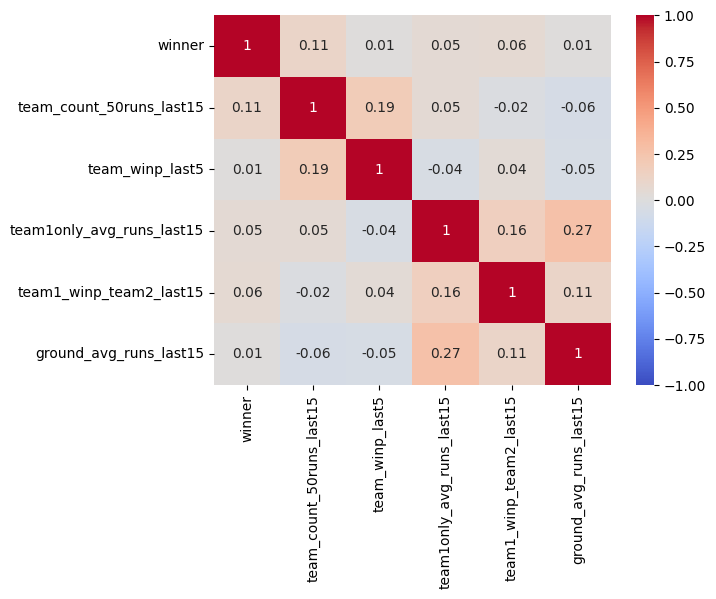

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
temp = train.copy()
temp.fillna(temp.mean(), inplace=True)
temp["winner"] = temp.apply(lambda row: 1 if row["winner_id"] == row["team1_id"] else 0, axis=1)
temp.drop(["winner_id","team1_id","team2_id","match id","ground_id"], axis=1,  inplace = True)
corr = temp.corr().round(2)
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin = -1, vmax=1)
plt.show()

Existing Variables as clearly very uncorrelated with

# Amex Rules
### Amex said a row's features can only be created from matches that happened before that row's date. 
So the match.csv has teamwise statistics. bowler.csv and batsman.csv has playerwise statistics. And all features created for R1.csv and train.csv should only use datapoints that fall before that particular data

So we
1. Choose what Teamwise Features we are going to create
2. Choose what Playerwise Features we are going create and add/aggregate according to the Players in Roster (Also choose addition method. Normal addition, or Log addition or Mean of top 5 ...)
3. Write functions that create these features after putting a date filter on match.csv, batsman.csv and bowler.csv
4. Apply these functions to train.csv and save it to "train_with_features.csv" and train the model
5. Apply these functions to R1.csv and make predictions

# Teamwise Features
Some Teamwise Features that might make sense are:
#### 1. Pythagoras Expectation from all the games so far

Win % ~ (Runs Scored)^n/((Runs Scored)^n+(Runs Given)^n)
 
   There are multiple variants possible in this itself. Firstly the choice of exponent (Power 2? or 1.67? or 13?). Secondly how far into history we take the model (All matches in history? Only matches in this year so far? Only matches with same Roster of Players? Until last year?). Finally, deciding how  we add bonus when the match is won by chasing and the winning team had extra overs left

#### 2. Current Form

We can use the number games the Team has won in the past few games. This gives an estimate of the form of the team right now. Again there are variants possible with how many games backwards we go, or if we do a regularized sum (A + B\*lr + C\*lr^2 + D\*lr^4...)

#### 3. Venue Effects

We can model home ground or not. We can use the % wins on the current venue in the past. Again the same question of how far behind or what kinda regularization comes in.

#### 4. History of Two Teams

We can use the data on one team going against the other

#### 5. Toss Winner Advantage

We can model who won the toss in two hot encoded variables

#### Very Important: There are more than 100 teams in the dataset, and only 900 Data Points to train from. Most of these team-wise statistics are just gonna be uncorrelated and useless. But since XGBoost creates splits based on Information Gain, if something is not adding value in the Tabular Data, that feature is just ignored, it won't have any detrimental effects

Also note that we can even make all the variations and just put it into our tabular data and let XGBoost choose which one to use too

# Playerwise Features - The MoneyBall Method

### MoneyBall followed the following procedure:
1. Find Team feature correlated the most with winning (They made a scatter plot and found that total runs >800 was winning)
2. Find what feature in individual players of the team when summed up correlated the most with this winning variable (They found that OBP correlated the most with runs)
3. Found players such that the just satisfied the condition on these aggregate features (They hired players such that adding their OBP summed up to the required amount)

Most important finding was that individual runs scored actually had a negative correlation with the team runs scored. And a non-intuitive set of variables correlated with the team runs scored

Now, Moneyball was when XGBoost, Pandas and Neural Networks weren't commonplace and they had to use Linear Regression for everything. Now that we have all these, we can directly compare the aggregates with **A: Winning (or) B: Runs Margin (or) C: Team Runs Scored for Batsmen & Team Runs Given for Bowlers** itself instead of the the intermediate step. 

Features to try:

#### 1. Overs on-field (Ability to stay on-field)
#### 2. Number of Singles and Number of Wide Balls left (Equivalent to OBP) and Number of Singles/Docks Given
#### 3. Strike Rate (Equivalent to SLG) and Run-Given Rate
#### 4. Number of Games or Venues (Particularly International) played - Quantizes Experience & Adaptability
#### 5. Other obvious metrics like Average Runs, Number of Wins, Number of Wickets

Aggregation Methods to try:

#### 1. Simple Addition
Makes sense for quantities like Runs, Wickets, Dismissals per Match, etc
#### 2. Averaging top-k Players
Makes sense for Strike Rate and Run-Given Rate
#### 3. Logarithmic Adding and Reversing
#### 4. Odds Adding and Reversing
#### 5. 2^Entropy

# 2401.15161v1 O Sadekar et al. discusses some results:
1. Peak Performance of Players occurs in short bursts. So if a player is at their highest point in their career so far, it's likely that the older statistics are irrelevant right now
2. Players who are excluded for a while and are returning tend to have a strong comeback
3. We can suppose that the fractional contribution by a player fc= 1/2(fraction of runs contributed + fraction of wickets). Then we can take Entropy = sum(fc log_2(fc)). And then Effective Number of Players = 2^Entropy. This can be used as a feature and be tried to correlate with winning
4. Fielding and Wicket Keeping are underrated. "Catches win Matches" - They Define something called the number of dismissals per match. Which can possibly be a feature we count too.
5. Lose and Win Streaks. A streak is more likely to continue.

So some more features we can include from these are:

#### 1. Playerwise - Dismissals per match (Catches, Wicket Keeps)
out_by_fielder column in batsman.csv has fielder name in encoded format. This has to be tallied with other data and used.
#### 2. Teamwise - Effective Number of Players
Playerwise fc = 1/2(Fraction of Runs Contributed + Fraction of Wickets Contributed)
Entropy = Sum fc Log_2(fc)
Effective Number of Players = 2^Entropy
#### 3. Teamwise - W_Streaks and L_Streaks
The matchwise data can be sorted with date and used

#### General: Playerwise Statisics unlike Teamwise should not be long-term. Short-term matters the most

# Coding the Teamwise Features

In [82]:
match = match.sort_values(by="match_dt", ascending = True)
match

,match id,team1,team2,winner,by,win amount,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,umpire1,umpire2,inning1_runs,inning1_wickets,inning1_balls,inning2_runs,inning2_wickets,inning2_balls,team1_id,team1_roster_ids,team2_id,team2_roster_ids,series_type,winner_id,player_of_the_match_id
0,8638034,Nn Ds,Wn,Wn,wickets,9.0,Wn,field,By Ol,Mount Maunganui,2021-01-01,night match,Sr Sh,2020/21,17681,Dn Mw,TJ Pe,148,6,130,152.0,1.0,97.0,17982,7907451.0:4381761.0:31464.0:258649.0:4949790.0...,18570,2653993.0:6718326.0:6718382.0:2486896.0:228878...,other_domestic,18570,NaN
1,8588005,Me Rs,Sy Tr,Sy Tr,runs,7.0,Sy Tr,field,Ca Ol,Carrara,2021-01-01,night match,Bg Bh Le,2020/21,6663,D Tr,PJ Ge,166,6,106,117.0,2.0,74.0,33942,37351.0:46794.0:5406540.0:2231928.0:181404.0:1...,33963,1506098.0:1749075.0:36665.0:2083409.0:7534652....,other_domestic,33963,1749075.0
2,8587837,Sy Ss,Be Ht,Be Ht,wickets,4.0,Sy Ss,bat,Be Ct Gd,Brisbane,2021-01-02,night match,Bg Bh Le,2020/21,1476,GJ Dn,PJ Ge,165,8,126,171.0,6.0,119.0,33956,7869987.0:7620283.0:2076192.0:4002340.0:306369...,33921,7620269.0:2286437.0:87191.0:5786766.0:3114803....,other_domestic,33921,3890984.0
3,8638041,Nn Ds,Oo,Oo,wickets,2.0,Oo,field,By Ol,Mount Maunganui,2021-01-02,night match,Sr Sh,2020/21,17681,GA St,TJ Pe,153,7,128,156.0,8.0,126.0,17982,7907451.0:4381761.0:31464.0:4949790.0:258649.0...,18360,2319638.0:256080.0:7918280.0:3913447.0:2690498...,other_domestic,18360,NaN
4,8587921,Ht Hs,Me Ss,Ht Hs,runs,21.0,Me Ss,field,Be Ol,Hobart,2021-01-02,day/night match,Bg Bh Le,2020/21,6348,GA Ad,NR Je,164,5,126,143.0,9.0,123.0,33928,4223883.0:2161599.0:1655436.0:5788418.0:319948...,33949,363047.0:2275097.0:3901078.0:2275195.0:4230127...,other_domestic,33928,3125849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,9717504,Nw Zd,Bh,Bh,wickets,5.0,Bh,field,Mn Pk Nr,Napier,2023-12-27,night match,Bh tr of Nw Zd,2023/24,3184,SB Hg,WR Ks,134,9,121,137.0,5.0,114.0,48,6718326.0:4381761.0:2672214.0:5764576.0:306995...,188,3758565.0:2104332.0:4403419.0:3056752.0:693023...,international,188,5831622.0
762,9866373,Oo,Wn,Wn,wickets,9.0,Oo,bat,Mx Pk Aa,Alexandra,2023-12-28,day/night match,Sr Sh,2023/24,5382,JM Dy,KS Jn,47,10,80,53.0,1.0,29.0,18360,2319638.0:8444855.0:4172706.0:7907444.0:631714...,18570,9036516.0:8271969.0:3913447.0:9523954.0:835478...,other_domestic,18570,6718410.0
831,9702783,Ht Hs,Me Ss,Me Ss,wickets,7.0,Me Ss,field,Be Ol Ht,Hobart,2023-12-28,night match,Bg Bh Le,2023/24,6348,BC Tr,SJ Ni,155,10,122,67.0,3.0,42.0,33928,1611364.0:5843200.0:5716402.0:3890963.0:194364...,33949,5406540.0:2275195.0:2275097.0:3901078.0:796099...,other_domestic,33949,2275195.0
1355,9702790,Ae Ss,Me Rs,Me Rs,wickets,4.0,Ae Ss,bat,Ds Sm Me,Melbourne,2023-12-29,night match,Bg Bh Le,2023/24,8252,BJ Od,GA Ad,177,6,123,178.0,5.0,115.0,33914,4239038.0:2161599.0:2286472.0:5469008.0:368195...,33942,4003390.0:2654014.0:8176356.0:46794.0:1635773....,other_domestic,33942,8176356.0


In [83]:
train

,match id,team1,team1_id,team1_roster_ids,team2,team2_id,team2_roster_ids,winner,winner_id,toss winner,toss decision,venue,city,match_dt,lighting,series_name,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15
0,9331181,Ba,11283,9373356.0:7857520.0:4232164.0:4566540.0:329940...,Hl Ph,12634,3500958.0:4231751.0:2735081.0:2035102.0:369833...,Hl Ph,12634,Hl Ph,field,Hr Ct Sm Ie,Indore,2022-10-20,day/night match,Sd Mq Ai Ty,2022/23,7398,1.666667,0.672131,139.000000,100.00,157.178571
1,8797060,Ed,20,2089079.0:6139370.0:2076192.0:62432.0:2083409....,Wt Is,41,4690258.0:4069666.0:4230127.0:1942317.0:161392...,Ed,20,Wt Is,field,Kn Ol Bn Bs,Bridgetown,2022-01-23,day/night match,Ed tr of Wt Is,2021/22,1406,1.285714,1.952381,156.000000,50.00,103.500000
2,9433269,We,10576,3298427.0:2288789.0:7773338.0:3519011.0:368195...,Ne,8987,4003390.0:1749075.0:1626526.0:4172447.0:551672...,We,10576,Ne,field,Tt Be Nm,Nottingham,2023-06-02,day/night match,Vy Bt,2023,251,0.857143,0.672131,173.266667,0.00,154.333333
3,9587073,Ga An Ws,36084,8127230.0:4690328.0:4069666.0:7960847.0:469018...,Bs Rs,36070,3462080.0:2436405.0:1798705.0:7550857.0:574247...,Ga An Ws,36084,Ga An Ws,bat,Bn La Sm Ta Td,Tarouba,2023-09-10,day match,Cn Pr Le,2023,14300,2.166667,1.975610,164.266667,50.00,144.250000
4,9516457,Pb Ks,30407,8127181.0:197658.0:4239038.0:2398346.0:5053082...,Gt Ts,48341,1958683.0:7491224.0:8059029.0:4377610.0:225245...,Gt Ts,48341,Gt Ts,field,Pb Ct An IS Ba Sm Mi Ch,Chandigarh,2023-04-13,night match,In Pr Le,2023,7118,0.818182,1.327869,164.666667,0.00,189.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,9128601,Pb Ks,30407,2789079.0:197658.0:2398346.0:2827327.0:2082044...,Ci Sr Ks,30414,7422673.0:249087.0:3519011.0:5001170.0:232000....,Pb Ks,30407,Ci Sr Ks,field,We Sm Mi,Mumbai,2022-04-25,night match,In Pr Le,2022,5004,0.823529,1.000000,147.333333,66.67,166.400000
944,9433241,Mx,8700,4421689.0:7752989.0:1941743.0:4489722.0:767287...,St,9701,6139370.0:7694581.0:3294444.0:3239102.0:632036...,St,9701,St,field,Te Cr As Cy Gd Tn,Taunton,2023-06-02,day/night match,Vy Bt,2023,1042,1.571429,0.012346,167.400000,0.00,170.466667
945,9097227,Bd,22497,4239773.0:1941743.0:3007969.0:4172972.0:155625...,Wn Pe,23869,323049.0:4876122.0:4164978.0:1837205.0:3373138...,Wn Pe,23869,Bd,bat,St Gs Pk Pt Eh,Port Elizabeth,2022-02-07,day match,CA T0 Ce,2021/22,1224,3.000000,1.000000,NaN,0.00,NaN
946,9516695,Rn Rs,30428,8058959.0:2162782.0:2981614.0:4690188.0:212569...,Ss Hd,36014,5958840.0:7491294.0:3127354.0:3057312.0:420349...,Ss Hd,36014,Rn Rs,bat,Si Mh Sm Jr,Jaipur,2023-05-07,night match,In Pr Le,2023,4661,0.789474,1.487805,182.800000,66.67,133.375000


In [85]:
X=pd.DataFrame()

In [ ]:
X[